<a href="https://colab.research.google.com/github/Gowr93/Project_Repository_GowriCS/blob/main/Sentiment_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sentiment analysist**

Sentiment analysis, or opinion mining, is the process of analyzing large volumes of text to determine whether it expresses a positive sentiment, a negative sentiment or a neutral sentiment.

In [1]:
# Import the required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# remove harmless warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Importing Data
data = pd.read_csv('/content/train_tweet.csv')

In [3]:
#Reviewing the shape of Dataset

print("The Number of Rows :\n",data.shape[0])
print("The Number of Columns :\n",data.shape[1])

The Number of Rows :
 31962
The Number of Columns :
 3


In [4]:
# Viewing the data sample
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
# Checking for Null value
data.isnull().sum()

,0
id,0
label,0
tweet,0


In [6]:
# Checking the datatypes
data.dtypes

,0
id,int64
label,int64
tweet,object


In [8]:
# Analysing the target column
print(" The values in the Target Variable ['label']\n",data['label'].unique())
print("*" *100)
print("The count of values in the Target Variable ['label']\n ",data['label'].value_counts())
print("*" *100)
print("The Distribution of values in the Target Variable['label']\n",data['label'].value_counts(normalize=True))

 The values in the Target Variable ['label']
 [0 1]
****************************************************************************************************
The count of values in the Target Variable ['label']
  label
0    29720
1     2242
Name: count, dtype: int64
****************************************************************************************************
The Distribution of values in the Target Variable['label']
 label
0    0.929854
1    0.070146
Name: proportion, dtype: float64


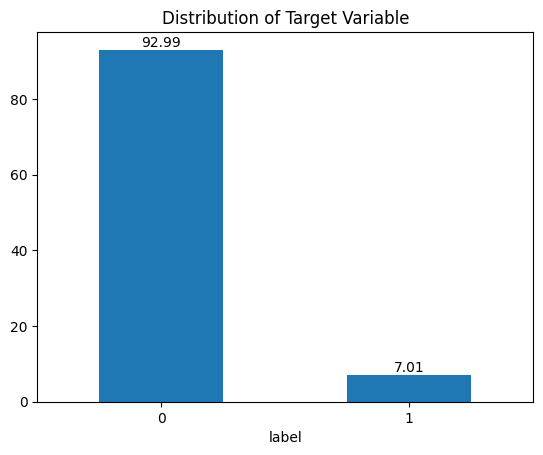

In [9]:
# Visualizing the target colum

fig = round(data['label'].value_counts(normalize=True)*100,2).plot.bar()
fig.bar_label(fig.containers[0])
plt.title('Distribution of Target Variable')
plt.xticks(rotation=0)
plt.show()

In [10]:
# Droping the id column as it doesn't contribute to analysis
data.drop(['id'],axis=1,inplace = True)

In [11]:
# Viewing data sample
data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [12]:
# Data samples of records where target is 1
data[data['label']==1].head()

,label,tweet
13,1,@user #cnn calls #michigan middle school 'buil...
14,1,no comment! in #australia #opkillingbay #se...
17,1,retweet if you agree!
23,1,@user @user lumpy says i am a . prove it lumpy.
34,1,it's unbelievable that in the 21st century we'...


In [13]:
#Data samples of records where target is 0
data[data['label']==0].head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [14]:
# Creating a dataframe to understand the most repeated word
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
words = count.fit_transform(data['tweet'])

sum_words = words.sum(axis=0)

word_freq = [(word, sum_words[0,i]) for word , i in count.vocabulary_.items()]
word_freq = sorted(word_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(word_freq, columns=['Word','Count'])
frequency.head()

,Word,Count
0,user,17577
1,love,2749
2,day,2311
3,amp,1776
4,happy,1686


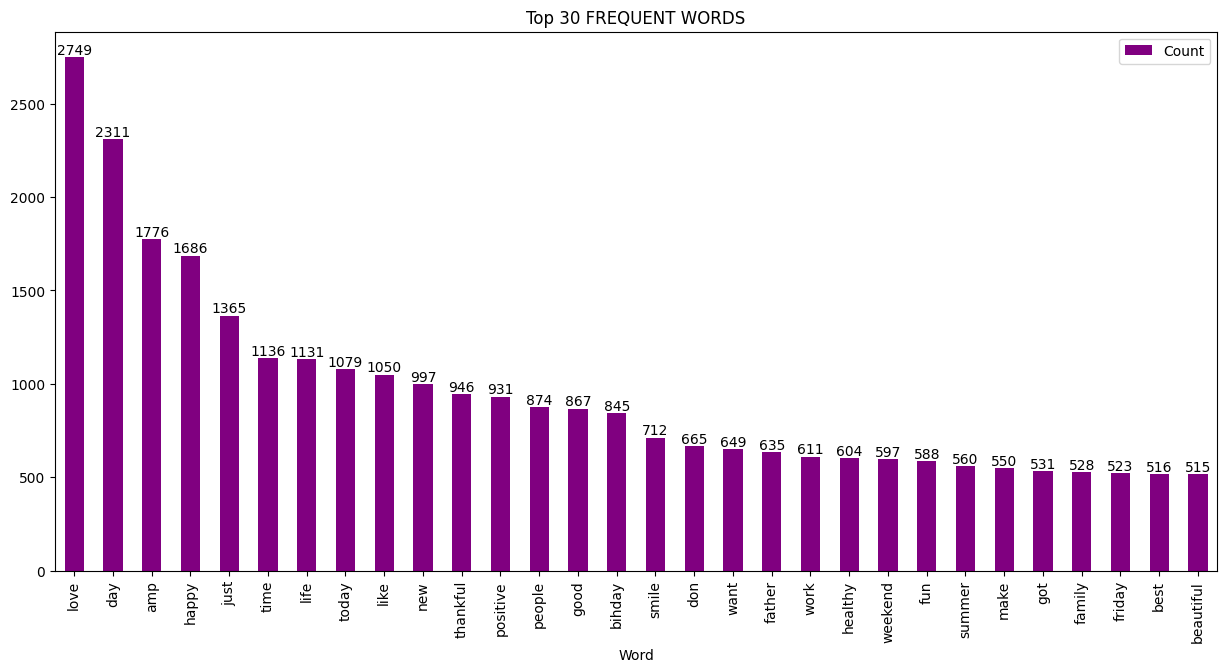

In [20]:
# Top 30 words with frequency
freq_plot = frequency.loc[1:30].plot(x='Word', y='Count', kind='bar', figsize=(15, 7), color='purple')
freq_plot.bar_label(freq_plot.containers[0])
plt.title('Top 30 FREQUENT WORDS')
plt.show()

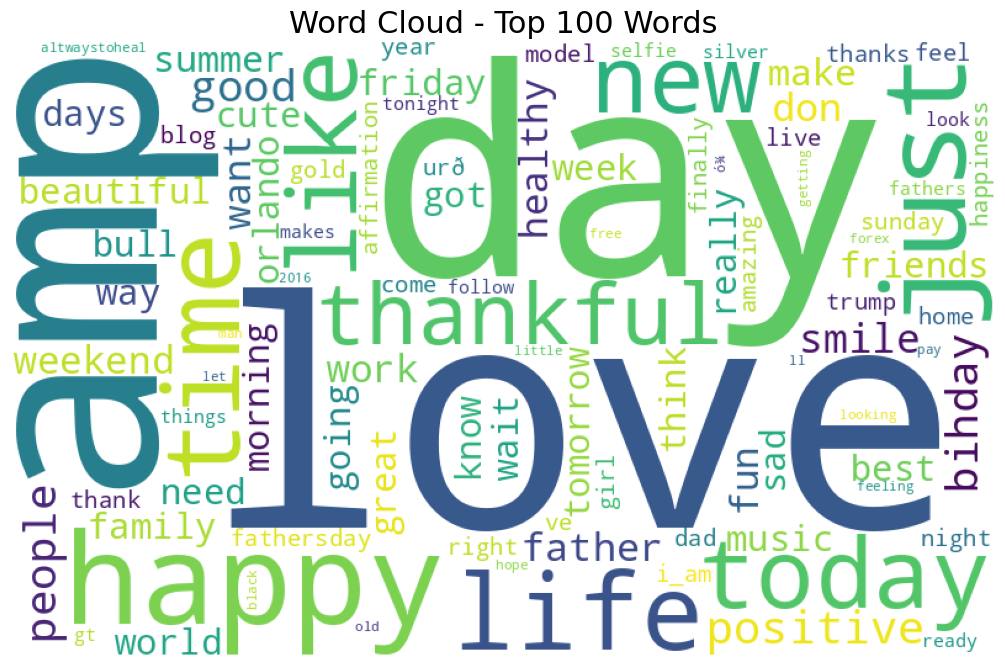

In [21]:
# Word Cloud by excluding the PII data

from wordcloud import WordCloud, STOPWORDS

wc_plot = WordCloud(background_color='white', width = 800, height = 500).generate_from_frequencies(dict(word_freq[1:100]))

plt.figure(figsize=(15,8))
plt.imshow(wc_plot)
plt.title('Word Cloud - Top 100 Words', fontsize = 22)
plt.axis('off')
plt.show()

In [22]:
# Function to extract hastags

def hastag_extr(x):
  hash=[]
  import re

  for i in x:
    ht = re.findall(r'#(\w+)', i)
    hash.append(ht)

  return hash


In [25]:
#Extracting the hashtag for positive tweet
ht_positive = hastag_extr(data['tweet'][data['label']==0])

#Extracting the hashtag for negative tweet
ht_negative = hastag_extr(data['tweet'][data['label']==1])


In [26]:
#unnesting
ht_positive = [hashtag for sublist in ht_positive for hashtag in sublist]
ht_negative = [hashtag for sublist in ht_negative for hashtag in sublist]

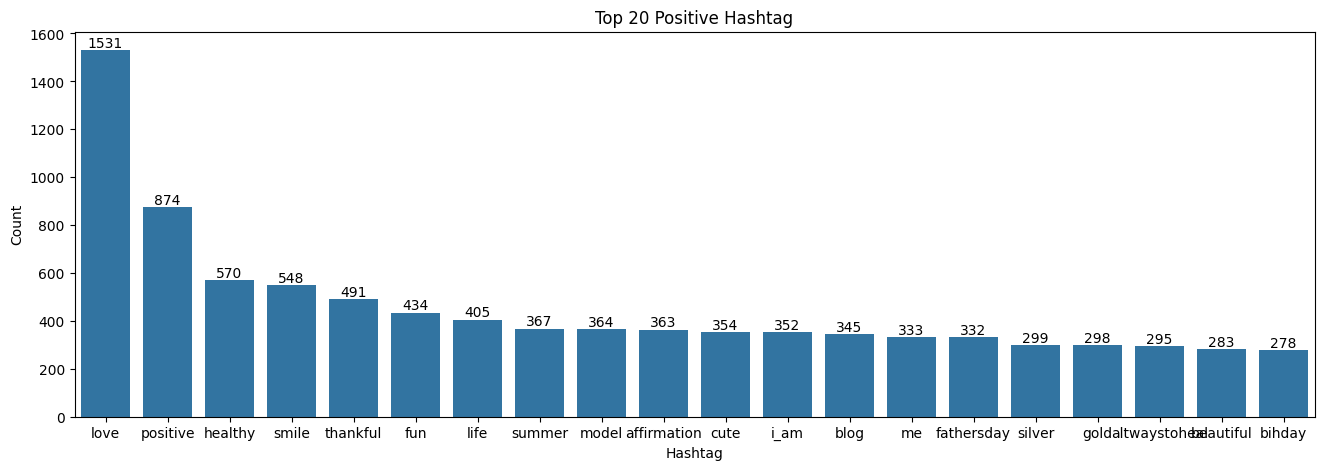

In [27]:
#Top 20 positive hastag
import nltk
a = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
#plot
d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.bar_label(ax.containers[0])
plt.title('Top 20 Positive Hashtag')
ax.set(ylabel = 'Count')
plt.show()

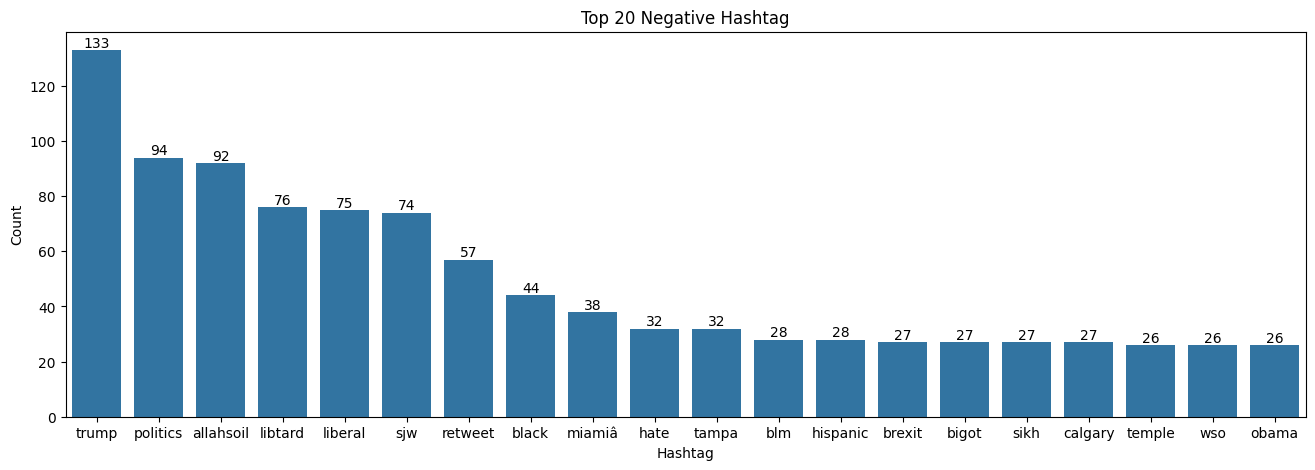

In [28]:
#Top 20 negative hastag
import nltk
a = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
#plot
d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.bar_label(ax.containers[0])
plt.title('Top 20 Negative Hashtag')
ax.set(ylabel = 'Count')
plt.show()

In [31]:
# Importing the required libraries
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
# Regex to retain only the text from the data
train_corpus =[]

for i in range(0,len(data)):
  review = re.sub('[^a-zA-Z]',' ',data['tweet'][i])
  review = review.lower()
  review = review.split()

  ps = PorterStemmer().stem
  # stemming
  review = [ps(word) for word in review if word not in stopwords.words('english')]

#  joining back the words
  review =  ' '.join(review)
  train_corpus.append(review)

In [34]:
# Embedding
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train_corpus).toarray()
y = data.iloc[:,0]

In [35]:
# Train-Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0,stratify=y)


Test Accuracy: 0.9404035664007508
F1-Score: 0.26019417475728157


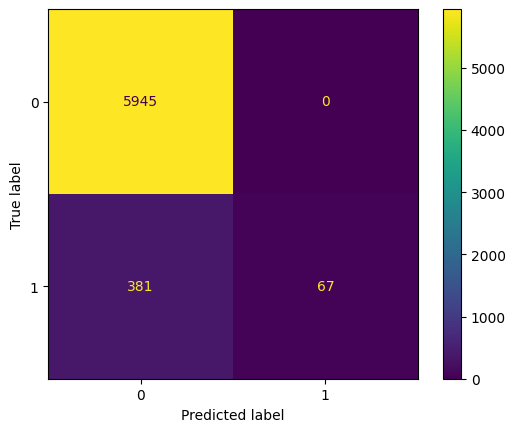

In [36]:
#ML Based NLP Model
#RandomForest

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,f1_score

rf_model = MultinomialNB()
rf_model.fit(X_train,y_train)

y_pred = rf_model.predict(X_test)

#Evaluation

print('Test Accuracy:',accuracy_score(y_test,y_pred))
print('F1-Score:',f1_score(y_test,y_pred))

cm =  ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [37]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

#Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 0.95%


## Saving the model

In [38]:
# Picking the Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(X_train,y_train)



LogisticRegression(random_state=42)

In [39]:
# Saving the model

# Importing the library
import joblib

In [40]:
# Save the model

joblib.dump(model, "Sentiment_Analysis.pk1")

['Sentiment_Analysis.pk1']

In [41]:
# Load the model
model = joblib.load("Sentiment_Analysis.pk1")

In [45]:
new_review=["The product is negative/not worth it "]
new_review_vec=vectorizer.transform(new_review)
pred_sentiment=model.predict(new_review_vec)
print("Predictful sentiment",pred_sentiment)

Predictful sentiment [0]


In [46]:
new_review=["The product is good and i love it "]
new_review_vec=vectorizer.transform(new_review)
pred_sentiment=model.predict(new_review_vec)
print("Predictful sentiment",pred_sentiment)

Predictful sentiment [0]
